<a href="https://colab.research.google.com/github/ibtehaaj/Deep-Learning/blob/master/DL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

# if tf.__version__ < "2.0.0":
#   !pip install --upgrade tensorflow_gpu==2.0

In [0]:
print(tf.__version__)

2.0.0


In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()     

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train, x_test = x_train / 255.0  ,  x_test / 255.0
x_train.shape


(60000, 28, 28)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0220 - accuracy: 0.9933
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0170 - accuracy: 0.9942
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0170 - accuracy: 0.9945
Epoch 4/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0175 - accuracy: 0.9942
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0162 - accuracy: 0.9948
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0154 - accuracy: 0.9946
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0141 - accuracy: 0.9953
Epoch 8/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0146 - accuracy: 0.9953
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0135 - accuracy: 0.9955
Epoch 10/10
60

In [0]:
evaluation = model.evaluate(x_test,  y_test, verbose=2)      

10000/1 - 1s - loss: 0.0391 - accuracy: 0.9815


In [0]:
print(evaluation[0])   #test loss
print(evaluation[1])   #test accuracy

0.07807853825769344
0.9815


array([9])

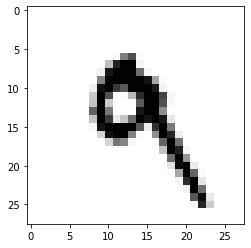

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_test[7],cmap='Greys')
model.predict_classes(x_test[7].reshape(1, 28, 28 ))


In [0]:
# model.save('dc.h5')

(10000, 28, 28)

In [0]:
c = 0
for i in range(0,1000):
    prediction =  model.predict_classes(x_test[i].reshape(1,28,28))
    if prediction != y_test[i]:
        c += 1

print(c)    

21


In [0]:
#validation data
x_val = x_train[:6000]
partial_x_train = x_train[6000:]
y_val = y_train[:6000]
partial_y_train = y_train[6000:]

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=30,validation_data=(x_val, y_val))


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 5s 93us/sample - loss: 0.0248 - accuracy: 0.9915 - val_loss: 0.0098 - val_accuracy: 0.9973
Epoch 2/30
54000/54000 [==============================] - 5s 87us/sample - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0131 - val_accuracy: 0.9950
Epoch 3/30
54000/54000 [==============================] - 5s 87us/sample - loss: 0.0235 - accuracy: 0.9921 - val_loss: 0.0143 - val_accuracy: 0.9955
Epoch 4/30
54000/54000 [==============================] - 5s 89us/sample - loss: 0.0216 - accuracy: 0.9925 - val_loss: 0.0183 - val_accuracy: 0.9948
Epoch 5/30
54000/54000 [==============================] - 5s 87us/sample - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0162 - val_accuracy: 0.9948
Epoch 6/30
54000/54000 [==============================] - 5s 85us/sample - loss: 0.0214 - accuracy: 0.9922 - val_loss: 0.0191 - val_accuracy: 0.9940
Epoch 7/30
54000/54000 [==============================] -

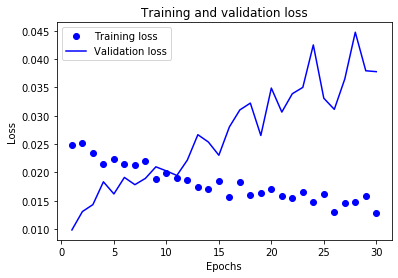

In [0]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

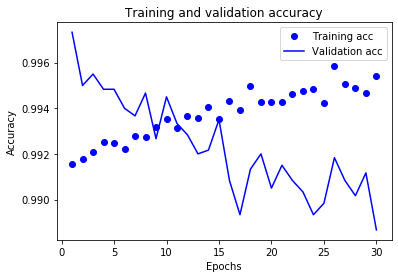

In [0]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()
plt.show()